<a href="https://colab.research.google.com/github/chaimaerachdi/miniProjetML__musical-style-detector/blob/main/miniprojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

             age     gender
count  25.000000  25.000000
mean   33.560000   0.440000
std    10.210615   0.506623
min    20.000000   0.000000
25%    26.000000   0.000000
50%    31.000000   0.000000
75%    35.000000   1.000000
max    56.000000   1.000000
-------------------------------------------------------------
entrainement du modèle Decision Tree
accuracy/ ou bien le score  du modèle Decision Tree: 0.60
rapport de classification pour le modèle Decision Tree:
              precision    recall  f1-score   support

      Melody       0.00      0.00      0.00         1
         Pop       0.00      0.00      0.00         1
     classic       1.00      1.00      1.00         2
      hiphop       1.00      1.00      1.00         1
         jaz       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.40      0.40      0.40         5
weighted avg       0.60      0.60      0.60         5

---------------------------------------------


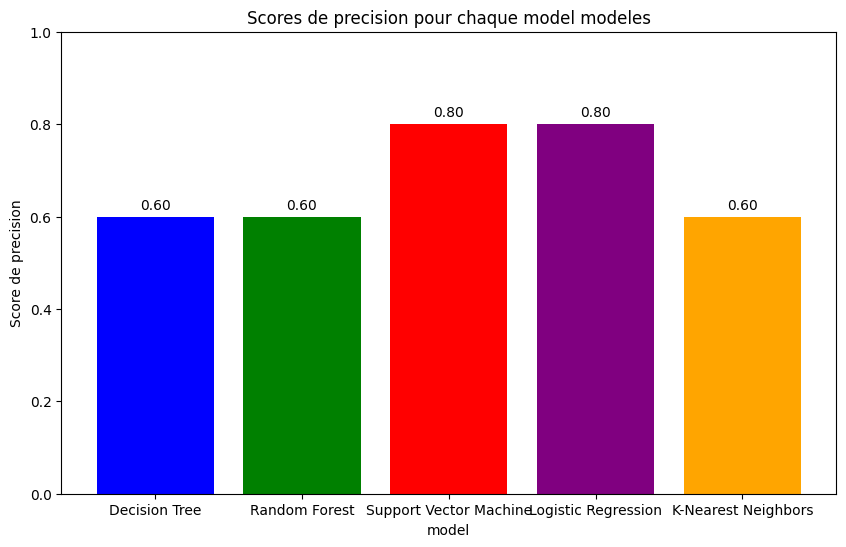

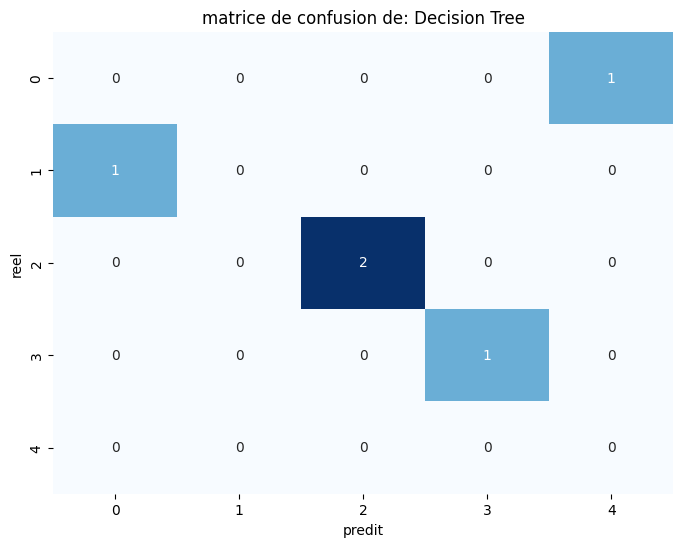

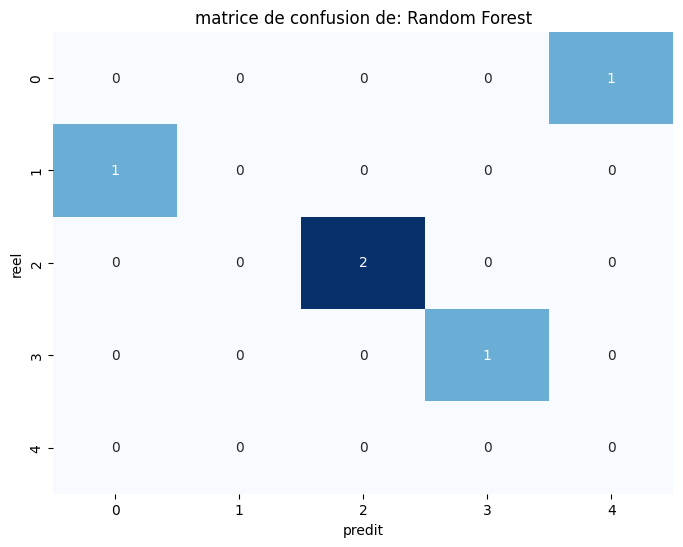

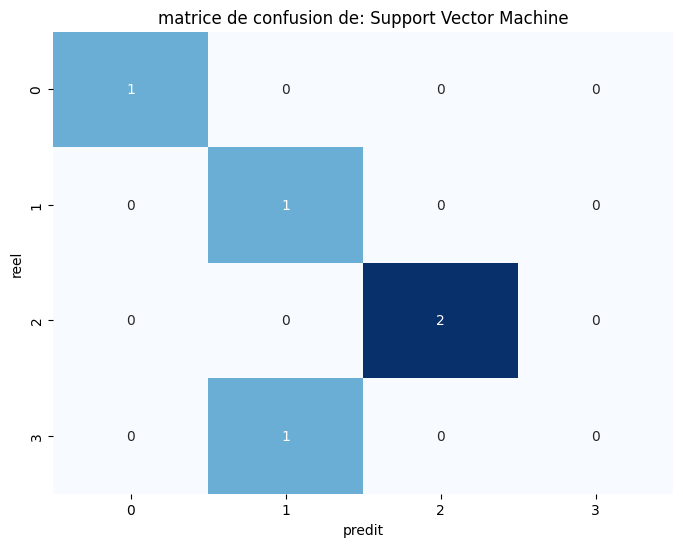

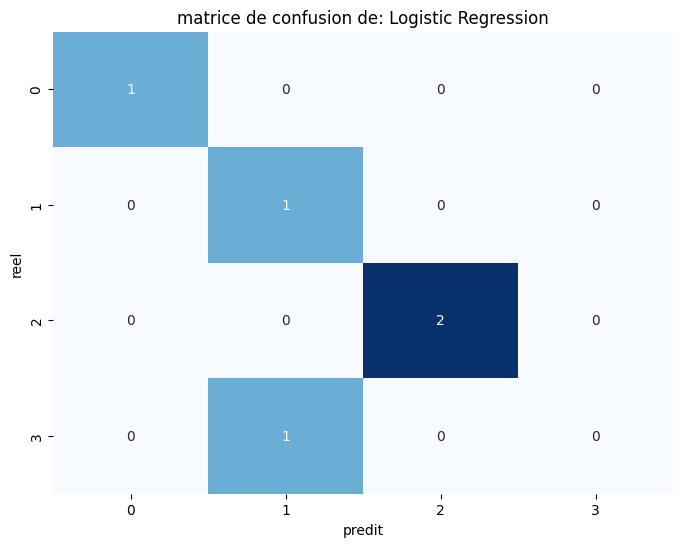

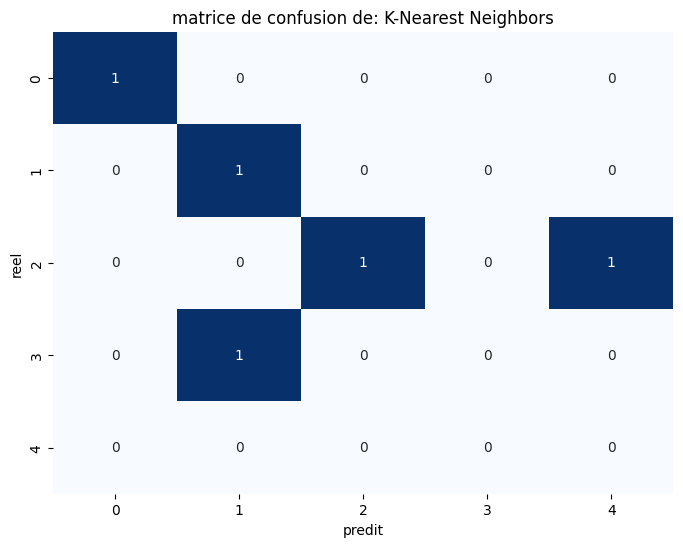

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('dataset.csv')
# display some statics of our dataset
print(df.describe())
print('-------------------------------------------------------------')
# # split data into train and test(X:input)
# delete lignes connatining  empty  values =>for simplicity
df.dropna(inplace=True)

# in our project we haven't any categorical varials==>no need for encoding gender=(0=fenmale/1=male)

# # split data into train and test(X:input)
X=df.drop(columns=['genre'])
# X
# y=output
y=df['genre']
# y
# # devide the data into 2 parts =train+test(0.2)------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# # choose a mode Desicition tree & make instance of this model to work with it(5 algo) and claculate teh score(model_scores) for each one to compare algos at the end ---------
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
model_scores = {}

# # fit=model learns the data =80%of the dataset=tein instead of fitting all the dataset for training----
##for each algo fit+predict+calculatethe score
for name, model in models.items():
    print(f'entrainement du modèle {name}')
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    model_scores[name] = accuracy
    print(f'accuracy/ ou bien le score  du modèle {name}: {accuracy:.2f}')
    print(f'rapport de classification pour le modèle {name}:')
    print(classification_report(y_test, predictions, zero_division=0))
    print('---------------------------------------------')

# #best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f'meilleur modèle sélectionné: {best_model_name} avec une accuracy de {model_scores[best_model_name]:.2f}')

# to store our trained model in a file to avoid wasting time at every turn to  retarin it ---------
#save best model in joblib format using dump method (best_music_classifier plays the role of a music-recommender system)
joblib.dump(best_model, 'best_music_classifier.joblib')
print(f'meilleur modèle sauvegarde: {best_model_name}')


#  on a fourni un rapport de classification(classification_report) détaillé pour chaque modèle, incluant des métriques telles que la précision, le rappel, le score F1, etc.,
#   pour chaque classe dans notre ensemble de donnees. Cela nous permet de comparer les performances des différents modèles de manière plus détaillée.
#cela repond a  la question :Établir une grille d’évaluation des algorithmes avec les différentes métriques
print('\n\n************************************visualisation of the results in form of graphs:********************************************************\n')



#visualisation des scores de précision/ par models
plt.figure(figsize=(10, 6))#
plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])#visualiser chaque model par ume coleur pour differencier--------
plt.xlabel('model')
plt.ylabel('Score de precision')
plt.title('Scores de precision pour chaque model modeles')
plt.ylim(0, 1)
for i, v in enumerate(model_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# matrice de confusion pour chaque modèle:
# (La matrice de confusion est essentielle pour comprendre en détail les
# performances et les erreurs des modèles de classification,
# , et elle permet de comparer plusieurs modèles de manière approfondie).
##reenterr dans la boule pour visualiser le resultat de chaaque model grapiquement:---------------------
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))##
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                cbar=False
                )

    plt.title(f'matrice de confusion de: {name}')
    plt.xlabel('predit')
    plt.ylabel('reel')
    plt.show()
